# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/My Drive/Machine Learning Lab/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f09c08b2700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected


In [ ]:
df.head(2)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [ ]:
df_select = df[['case_status', 'class_of_admission', 'application_type']]

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   case_status         374362 non-null  object
 1   class_of_admission  351517 non-null  object
 2   application_type    135269 non-null  object
dtypes: object(3)
memory usage: 8.6+ MB


In [ ]:
print(df_select.describe())

       case_status class_of_admission application_type
count       374362             351517           135269
unique           4                 57                3
top      Certified               H-1B           ONLINE
freq        181933             283018           112564


In [ ]:
df_select.isnull().sum()

case_status                0
class_of_admission     22845
application_type      239093
dtype: int64

# 3.) Clean your data for a decision tree


In [ ]:
print("Data Shape:")
print(df_select.shape)
print("\n")
print("Missing Values:")
print(df_select.isnull().sum())


Data Shape:
(374362, 3)


Missing Values:
case_status                0
class_of_admission     22845
application_type      239093
dtype: int64


In [ ]:
#Drop missing values 
df_select.dropna(inplace= True)

#check how many values are excluded after dropping duplicate values
print("Data Shape after dropping missing values:")
print(df_select.shape)

#Grab dummy variables
X = pd.get_dummies(df_select, 'class_of_admission', 'application_type', drop_first=True)
y = df_select['case_status']

Data Shape after dropping missing values:
(128492, 3)


# 4.) Fit and plot a decision tree of depth 3


In [ ]:
from sklearn import tree 

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'class_of_admissionapplication_typeCertified-Expired <= 0.5\ngini = 0.623\nsamples = 128492\nvalue = [58429, 51172, 11080, 7811]'),
 Text(0.5, 0.625, 'class_of_admissionapplication_typeDenied <= 0.5\ngini = 0.398\nsamples = 77320\nvalue = [58429, 0, 11080, 7811]'),
 Text(0.3333333333333333, 0.375, 'class_of_admissionapplication_typeWithdrawn <= 0.5\ngini = 0.208\nsamples = 66240\nvalue = [58429, 0, 0, 7811]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 58429\nvalue = [58429, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 7811\nvalue = [0, 0, 0, 7811]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 11080\nvalue = [0, 0, 11080, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 51172\nvalue = [0, 51172, 0, 0]')]

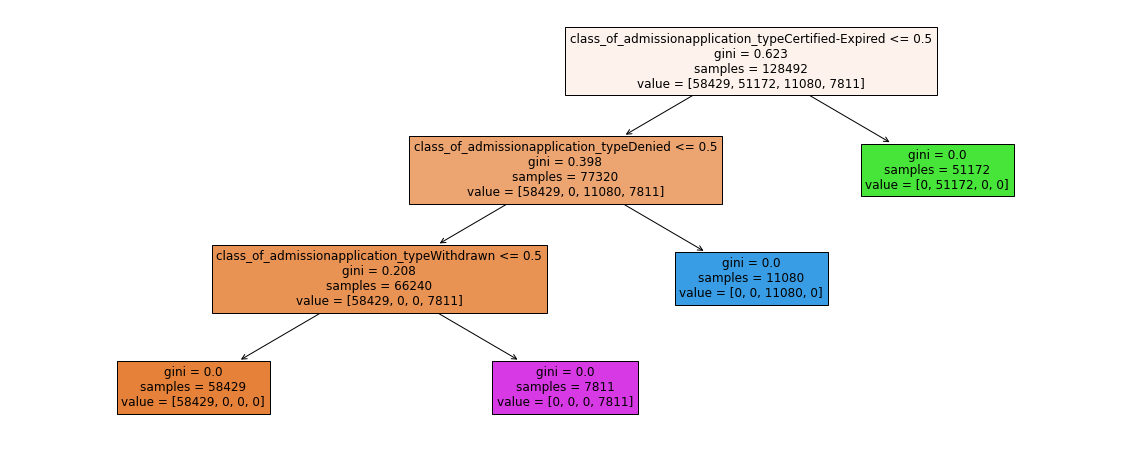

In [ ]:
plt.figure(figsize=(20,8))
tree.plot_tree(clf, feature_names=X.columns,filled=True)

# 5.) Write your interpretation of the largest (by sample size) leaf node


### In the example above, the largest leaf node is the one in the bottom left colored in orange. In this leaf node, there are 58,429 observations. The node contains a Gini score of 0.0 which is a good sign.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
max_depths = [1,2,3]
output = []

#train/test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  #predict on X_test
  y_pred =clf.predict(X_test)

  #Check accuracy
  oos_accuracy = accuracy_score(y_test, y_pred)
  output.append(oos_accuracy)


In [ ]:
best_max_index = np.argmax(accuracy_score)
print(best_index+1)
print('The best max_depth is:', best_max_index+1)

1
The best max_depth is: 1
